In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

In [2]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from tqdm import tqdm
from PIL import Image
%matplotlib inline     
sns.set(color_codes=True)

## Convert json to csv

In [6]:
data_dir="../data/polyvore_outfits/"

path2images = os.path.join(data_dir, "images")
filenames = os.listdir(path2images)
full_filenames = [os.path.join(path2images, filename)
                    for filename in filenames]

path2metadata = os.path.join(data_dir, "polyvore_item_metadata.json")
metadatas = json.load(open(path2metadata, 'r', encoding='UTF-8'))

In [7]:
df = pd.DataFrame(columns=['path', 'id', 'url_name', 'description',
                           'categories', 'title', 'related',
                           'category_id', 'semantic_category'])

In [8]:
for idx, image_fullname in tqdm(enumerate(full_filenames)):
    image_name = os.path.basename(image_fullname)
    item_id = os.path.splitext(image_name)[0]
    
    obj = {
        'path': image_fullname,
        'id': item_id
    }
    
    if item_id in metadatas:
        metadata = metadatas[item_id]
        url_name = metadata.get("url_name", "untitled").lower()
        if url_name == "untitled":
            url_name = ""
        
        if len(url_name) > 0:
            obj['url_name'] = url_name
        
        description = metadata.get("description", "").lower()
        
        if len(description) > 0:
            obj['description'] = description
        
        categories = metadata.get("catgeories", "")
        if type(categories) == list:
            obj['categories'] = categories
        
        title = metadata.get("title", "untitled").lower()
        if title == "untitled":
            title = ""
        
        if len(title) > 0:
            obj['title'] = title
        
        related = metadata.get("related", "")
        if type(related) == list:
            obj['related'] = related
            
        category_id = metadata.get("category_id", "")
        
        if len(category_id) > 0:
            obj['category_id'] = category_id
        
        semantic_category = metadata.get("semantic_category", "").lower()
        if len(semantic_category) > 0:
            obj['semantic_category'] = semantic_category

    # df.append(obj, ignore_index=True)
    df.loc[idx] = obj
    # break

261057it [2:57:24, 24.53it/s]


In [9]:
df.head()

,path,id,url_name,description,categories,title,related,category_id,semantic_category
0,./data/polyvore_outfits/images\100004189.jpg,100004189,retro hippie fashion metal lennon,NaN,NaN,NaN,NaN,57,sunglasses
1,./data/polyvore_outfits/images\100005237.jpg,100005237,amazon.com 100 imported cashmere gloves,NaN,NaN,NaN,NaN,53,accessories
2,./data/polyvore_outfits/images\100007550.jpg,100007550,mcq alexander mcqueen tailored tuxedo,NaN,NaN,NaN,NaN,4,all-body
3,./data/polyvore_outfits/images\100010397.jpg,100010397,nfinity vengeance cheerleading shoe,NaN,NaN,NaN,NaN,41,shoes
4,./data/polyvore_outfits/images\100010564.jpg,100010564,i36033 001 d%c3%a9collet%c3%a9 donna scarpe,NaN,"[Women's Fashion, Shoes, Pumps, Giuseppe Zanot...",i36033 001 - décolleté donna - scarpe donna su...,"[Giuseppe Zanotti, High heeled footwear, Heel ...",41,shoes


In [10]:
df.to_csv('../data/csv_files/original_polyvore.csv')

## EDA

In [3]:
df = pd.read_csv('../data/csv_files/original_polyvore.csv', index_col=0)

In [4]:
df.head()

,path,id,url_name,description,categories,title,related,category_id,semantic_category
0,./data/polyvore_outfits/images\100004189.jpg,100004189,retro hippie fashion metal lennon,NaN,NaN,NaN,NaN,57.0,sunglasses
1,./data/polyvore_outfits/images\100005237.jpg,100005237,amazon.com 100 imported cashmere gloves,NaN,NaN,NaN,NaN,53.0,accessories
2,./data/polyvore_outfits/images\100007550.jpg,100007550,mcq alexander mcqueen tailored tuxedo,NaN,NaN,NaN,NaN,4.0,all-body
3,./data/polyvore_outfits/images\100010397.jpg,100010397,nfinity vengeance cheerleading shoe,NaN,NaN,NaN,NaN,41.0,shoes
4,./data/polyvore_outfits/images\100010564.jpg,100010564,i36033 001 d%c3%a9collet%c3%a9 donna scarpe,NaN,"[""Women's Fashion"", 'Shoes', 'Pumps', 'Giusepp...",i36033 001 - décolleté donna - scarpe donna su...,"['Giuseppe Zanotti', 'High heeled footwear', '...",41.0,shoes


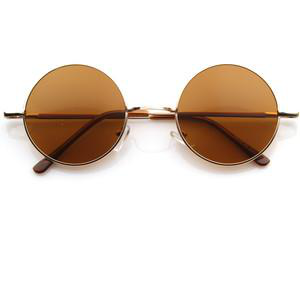

In [10]:
data_dir="../data/polyvore_outfits/"

# print(df["path"][0])
image = Image.open(os.path.join(data_dir, "images", str(df["id"][0]) + ".jpg"))
display(image)

In [11]:
df.dtypes

path                  object
id                     int64
url_name              object
description           object
categories            object
title                 object
related               object
category_id          float64
semantic_category     object
dtype: object

In [12]:
df.shape

(261057, 9)

In [13]:
df.count()

path                 261057
id                   261057
url_name             251003
description           72152
categories            74852
title                 74839
related               74852
category_id          251008
semantic_category    251008
dtype: int64

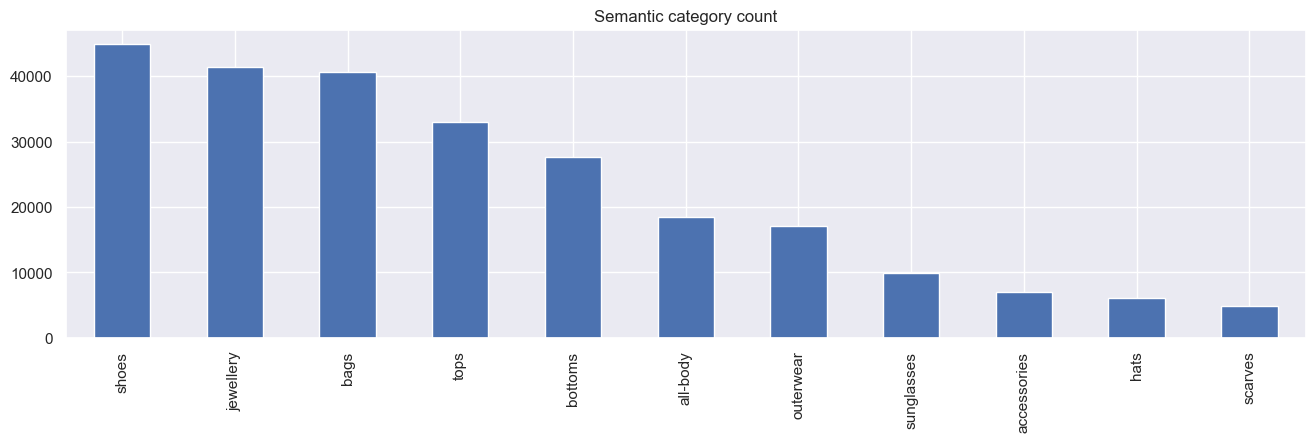

In [14]:
plt.figure(figsize=(16,4))

df["semantic_category"].value_counts(sort=True).plot(kind='bar')
plt.title('Semantic category count')

plt.show()

In [15]:
df.dropna(subset = ['description'], inplace=True)

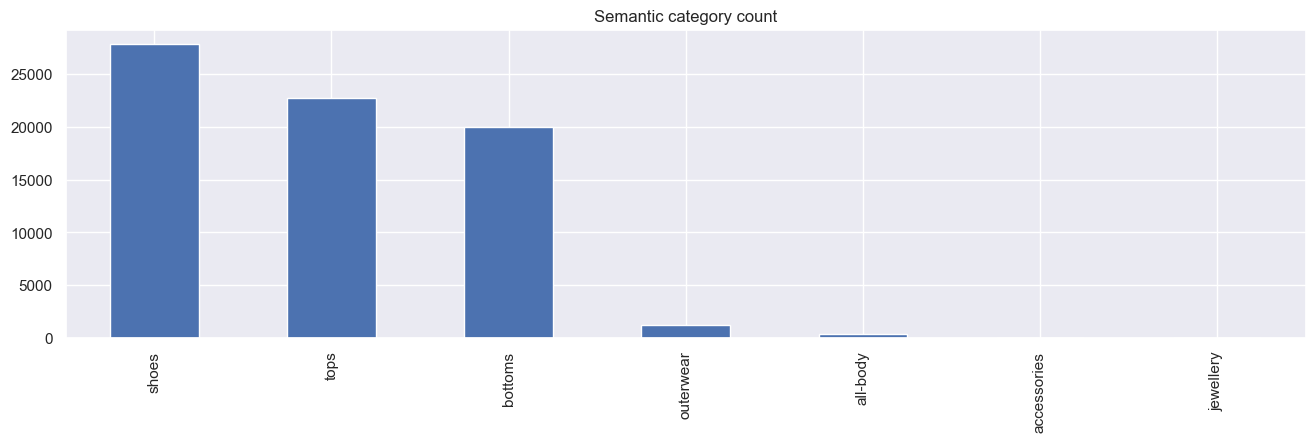

In [16]:
plt.figure(figsize=(16,4))

df["semantic_category"].value_counts(sort=True).plot(kind='bar')
plt.title('Semantic category count')

plt.show()